In [8]:
# 環境判定とライブラリセットアップ
import sys
import os

# Google Colab環境かどうかを判定
try:
    import google.colab
    IN_COLAB = True
    print("Google Colab環境で実行中")
except ImportError:
    IN_COLAB = False
    print("ローカル環境で実行中")

# ライブラリのセットアップ
if IN_COLAB:
    # Google Colab環境では、GitHubからクローンしてインストール
    if not os.path.exists('simple-audio-programming'):
        !git clone https://github.com/your-username/simple-audio-programming.git
        os.chdir('simple-audio-programming')
    !pip install -e .
else:
    # ローカル環境では、パッケージが存在するかチェック
    try:
        import audio_lib
        print("audio_libが既にインストールされています")
    except ImportError:
        # パッケージが見つからない場合、パスを追加
        current_dir = os.path.dirname(os.path.abspath('.'))
        parent_dir = os.path.dirname(current_dir)
        if os.path.exists(os.path.join(parent_dir, 'audio_lib')):
            sys.path.insert(0, parent_dir)
            print(f"パスを追加しました: {parent_dir}")
        else:
            # 開発モードでインストールを試行
            !pip install -e ..
            print("開発モードでパッケージをインストールしました")

print("セットアップ完了")

ローカル環境で実行中
Obtaining file:///Users/gsuzuki/projects/teaching/simple-audio-programming
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for simple-audio-programming (pyproject.toml) ... done
  Created wheel for simple-audio-programming: filename=simple_audio_programming-1.0.0-0.editable-py3-none-any.whl size=10137 sha256=f7ead13d5b459beb9c2d928d428c117748ff6e69432c72023f5ccad0cdab0cd4
  Stored in directory: /private/var/folders/zc/5fcnnpks6jz06b0n0_b6ngjm0000gn/T/pip-ephem-wheel-cache-606ky_zp/wheels/a3/e3/4b/e50fa99df2b93eb93a3b05dd24a60e1b01043af9165e7ac582
Successfully built simple-audio-programming
  Attempting uninstall: simple-audio-programming
    Found existing installation: simple-audio-programming 1.0.0
    Uninstalling simple-audio-programming-1.0.0:
      Successfully uninstalled simple-audio-progra

# 音のプログラミング 第1回: 基本概念とサイン波

**学習目標:**
- 音とプログラミングの関係を理解する
- サイン波の基本概念を学ぶ
- 周波数と音程の関係を体験する
- 最初の音を生成・再生する

**所要時間:** 90分

## 🛠️ 環境設定

まず、音のプログラミングライブラリをダウンロードして設定します。

In [1]:
# Google Colab環境の確認とセットアップ
import sys

# Colab環境かどうかを確認
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("🔧 Google Colab環境を設定中...")
    
    # 必要なパッケージをインストール
    !pip install numpy scipy matplotlib ipython japanize-matplotlib
    
    # GitHubからライブラリをクローン
    !git clone https://github.com/ggszk/simple-audio-programming.git
    
    # パスを追加
    sys.path.append('/content/simple-audio-programming')
    
    print("✅ セットアップ完了！")
    print("📝 このノートブックを自分用にコピーするには:")
    print("   ファイル → ドライブにコピーを保存")
    
else:
    print("🏠 ローカル環境で実行中")
    print("📝 audio_libがインストールされていることを確認してください")

# 共通インポート
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォント設定（Colab用）
if IN_COLAB:
    import japanize_matplotlib
    print("✅ 日本語フォントを設定しました")

from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

print("\n🎵 Simple Audio Programming へようこそ！")

🏠 ローカル環境で実行中
📝 audio_libがインストールされていることを確認してください

🎵 Simple Audio Programming へようこそ！

🎵 Simple Audio Programming へようこそ！


In [2]:
# 音声再生用ヘルパー関数
def play_sound(signal, sample_rate=44100, title="Audio"):
    """
    Colab/Jupyter環境で音声を再生するヘルパー関数
    
    Args:
        signal: オーディオ信号（numpy配列）
        sample_rate: サンプリングレート（Hz）
        title: 表示用タイトル
    """
    print(f"🔊 {title} (サンプルレート: {sample_rate} Hz)")
    return Audio(signal, rate=sample_rate)

def plot_waveform(signal, sample_rate=44100, duration=0.01, title="波形"):
    """
    波形を可視化するヘルパー関数
    
    Args:
        signal: オーディオ信号
        sample_rate: サンプリングレート
        duration: 表示する時間長（秒）
        title: グラフのタイトル
    """
    time_samples = int(duration * sample_rate)
    time_samples = min(time_samples, len(signal))
    time_array = np.linspace(0, duration, time_samples)
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_array, signal[:time_samples], 'b-', linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel('時間 (秒)', fontsize=12)
    plt.ylabel('振幅', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

print("🛠️ ヘルパー関数を読み込みました")

🛠️ ヘルパー関数を読み込みました


## 🎵 音とは何か？

### 音の正体
- 音は **空気の振動**
- 振動が波として伝わる
- **周波数**（1秒間の振動回数）で音程が決まる
- **振幅**（振動の大きさ）で音量が決まる

### サイン波
最も基本的な音の波形は **サイン波（正弦波）**

数式: `y = sin(2π × 周波数 × 時間)`

## 🎯 実習1: 最初のサイン波を作ろう

In [10]:
# パッケージをインストール（必要に応じて）
import sys
import os

# 既にセットアップが実行されているかチェック
if 'audio_lib' not in sys.modules:
    try:
        # ローカル環境での開発モードインストール
        current_dir = os.getcwd()
        parent_dir = os.path.dirname(current_dir)
        if os.path.exists(os.path.join(parent_dir, 'setup.py')):
            print("開発モードでパッケージをインストール中...")
            get_ipython().run_line_magic('pip', 'install -e ..')
        else:
            print("親ディレクトリにsetup.pyが見つかりません")
    except Exception as e:
        print(f"インストールエラー: {e}")

# ライブラリパスの設定とインポート
# 現在のディレクトリから親ディレクトリのaudio_libを参照
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

# audio_libのパスを追加
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"パスを追加: {parent_dir}")

# 音のプログラミングライブラリをインポート
try:
    from audio_lib.core import AudioConfig
    from audio_lib.synthesis import SineWave
    from audio_lib import save_audio  # メインモジュールからインポート
    print("✅ ライブラリのインポートに成功しました")
except ImportError as e:
    print(f"❌ インポートエラー: {e}")
    print("ディレクトリ構造を確認してください")
    print(f"現在のディレクトリ: {current_dir}")
    print(f"親ディレクトリ: {parent_dir}")
    print(f"audio_libパス: {os.path.join(parent_dir, 'audio_lib')}")
    print(f"audio_lib存在確認: {os.path.exists(os.path.join(parent_dir, 'audio_lib'))}")
    raise

# オーディオ設定
config = AudioConfig(sample_rate=44100)  # CD品質

# サイン波オシレーター（音を作る機械）
sine_osc = SineWave(config)

print("🎵 サイン波オシレーターの準備完了！")

開発モードでパッケージをインストール中...
Obtaining file:///Users/gsuzuki/projects/teaching/simple-audio-programming
  Installing build dependencies ... Obtaining file:///Users/gsuzuki/projects/teaching/simple-audio-programming
  Installing build dependencies ... -done
  Checking if build backend supports build_editable ... one
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Getting requirements to build editable ... -done
  Preparing editable metadata (pyproject.toml) ... one
  Preparing editable metadata (pyproject.toml) ... -done
one
  Building editable for simple-audio-programming (pyproject.toml) ...   Building editable for simple-audio-programming (pyproject.toml) ... -done
  Created wheel for simple-audio-programming: filename=simple_audio_programming-1.0.0-0.editable-py3-none-any.whl size=10137 sha256=e1137a522f073e7956efd305264d845a44ff766a71b1d0fd7d204e595b97d473
  Stored in directory: /private/var/folders/zc/5fcnnpks6jz06b0n0_b6n

In [11]:
# 440Hz（ラ音）のサイン波を1秒間生成
frequency = 440.0  # Hz（ヘルツ）
duration = 1.0     # 秒

# サイン波を生成
signal = sine_osc.generate(frequency, duration)

print(f"✅ {frequency}Hzの音を{duration}秒分生成しました")
print(f"データの長さ: {len(signal)} サンプル")
print(f"最大振幅: {np.max(signal):.3f}")
print(f"最小振幅: {np.min(signal):.3f}")

✅ 440.0Hzの音を1.0秒分生成しました
データの長さ: 44100 サンプル
最大振幅: 1.000
最小振幅: -1.000


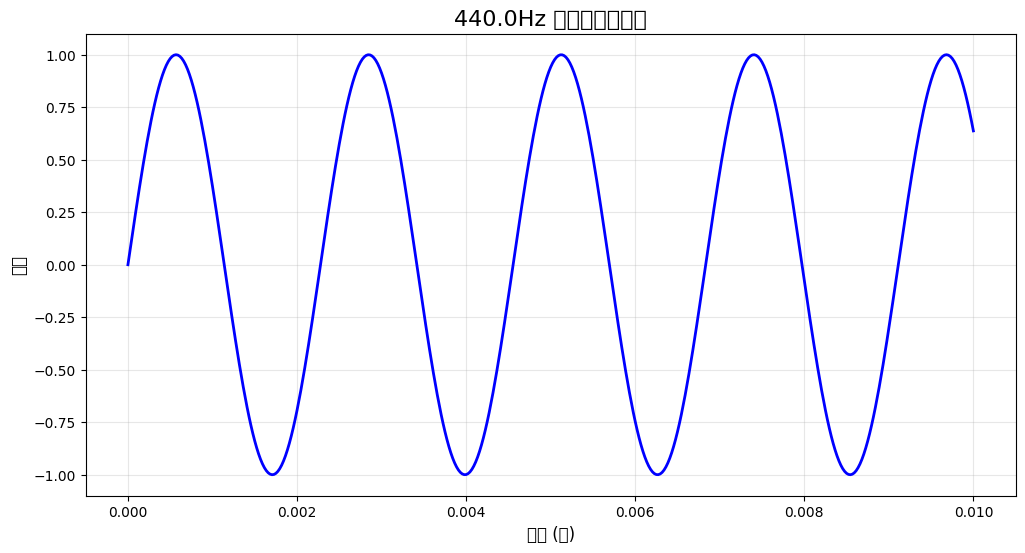

📊 これがサイン波の形です！きれいな波になっていますね。


In [12]:
# 波形を可視化してみよう
# ヘルパー関数を使って最初の0.01秒分を表示
plot_waveform(signal, config.sample_rate, duration=0.01, 
              title=f'{frequency}Hz サイン波の波形')

print("📊 これがサイン波の形です！きれいな波になっていますね。")

In [13]:
# 🔊 音を再生してみよう！
audio_player = play_sound(signal, config.sample_rate, f"{frequency}Hz サイン波")
display(audio_player)

print("🎵 これが440Hz（ラ音）の純粋なサイン波です！")
print("楽器の音とは違って、とてもシンプルな音ですね。")

🔊 440.0Hz サイン波 (サンプルレート: 44100 Hz)


🎵 これが440Hz（ラ音）の純粋なサイン波です！
楽器の音とは違って、とてもシンプルな音ですね。


## 🎯 実習2: 周波数を変えて音程を体験しよう

In [14]:
# 異なる周波数の音を作ってみよう
frequencies = {
    "低い音 (220Hz)": 220,
    "基準音 (440Hz)": 440,
    "高い音 (880Hz)": 880,
    "とても高い音 (1760Hz)": 1760
}

duration = 1.5  # 少し長めに

for name, freq in frequencies.items():
    print(f"\n🎵 {name}")
    signal = sine_osc.generate(freq, duration)
    audio_player = play_sound(signal, config.sample_rate, name)
    display(audio_player)
    
print("\n💡 気づいたこと:")
print("- 周波数が高いほど、音程が高くなる")
print("- 880Hzは440Hzの2倍 → 1オクターブ上の音")
print("- 1760Hzは440Hzの4倍 → 2オクターブ上の音")


🎵 低い音 (220Hz)
🔊 低い音 (220Hz) (サンプルレート: 44100 Hz)



🎵 基準音 (440Hz)
🔊 基準音 (440Hz) (サンプルレート: 44100 Hz)



🎵 高い音 (880Hz)
🔊 高い音 (880Hz) (サンプルレート: 44100 Hz)



🎵 とても高い音 (1760Hz)
🔊 とても高い音 (1760Hz) (サンプルレート: 44100 Hz)



💡 気づいたこと:
- 周波数が高いほど、音程が高くなる
- 880Hzは440Hzの2倍 → 1オクターブ上の音
- 1760Hzは440Hzの4倍 → 2オクターブ上の音


## 🎯 実習3: 音量を変えてみよう

In [15]:
# 同じ周波数で音量を変えてみよう
frequency = 440  # ラ音
duration = 1.0

volumes = {
    "とても小さい音 (0.1倍)": 0.1,
    "小さい音 (0.3倍)": 0.3,
    "普通の音 (1.0倍)": 1.0,
    "大きい音 (0.8倍)": 0.8  # 大きすぎないように
}

print("🚨 重要な注意点:")
print("📱 Colab/JupyterのAudioウィジェットは音量を自動正規化します")
print("🎧 そのため、下記の音は実際には同じ音量で聞こえます")
print("📁 真の音量差を確認するにはWAVファイル保存→ダウンロード→再生")
print("=" * 60)

for name, volume in volumes.items():
    print(f"\n🔊 {name}")
    signal = sine_osc.generate(frequency, duration)
    signal_with_volume = signal * volume  # 音量調整
    
    # ファイル保存で音量差を保持
    filename = f"volume_test_{volume:.1f}.wav"
    save_audio(filename, config.sample_rate, signal_with_volume)
    print(f"📁 保存: {filename} (振幅: {np.max(np.abs(signal_with_volume)):.3f})")
    
    audio_player = play_sound(signal_with_volume, config.sample_rate, f"{name} - 振幅: {volume}")
    display(audio_player)

print("\n💡 ポイント:")
print("・音量は波の振幅（高さ）で決まります")
print("・AudioウィジェットでなくWAVファイルで真の音量差を確認できます")
print("・実際の音楽制作では正確な音量管理が重要です")

🚨 重要な注意点:
📱 Colab/JupyterのAudioウィジェットは音量を自動正規化します
🎧 そのため、下記の音は実際には同じ音量で聞こえます
📁 真の音量差を確認するにはWAVファイル保存→ダウンロード→再生

🔊 とても小さい音 (0.1倍)
📁 保存: volume_test_0.1.wav (振幅: 0.100)
🔊 とても小さい音 (0.1倍) - 振幅: 0.1 (サンプルレート: 44100 Hz)



🔊 小さい音 (0.3倍)
📁 保存: volume_test_0.3.wav (振幅: 0.300)
🔊 小さい音 (0.3倍) - 振幅: 0.3 (サンプルレート: 44100 Hz)



🔊 普通の音 (1.0倍)
📁 保存: volume_test_1.0.wav (振幅: 1.000)
🔊 普通の音 (1.0倍) - 振幅: 1.0 (サンプルレート: 44100 Hz)



🔊 大きい音 (0.8倍)
📁 保存: volume_test_0.8.wav (振幅: 0.800)
🔊 大きい音 (0.8倍) - 振幅: 0.8 (サンプルレート: 44100 Hz)



💡 ポイント:
・音量は波の振幅（高さ）で決まります
・AudioウィジェットでなくWAVファイルで真の音量差を確認できます
・実際の音楽制作では正確な音量管理が重要です


## 🎯 実習4: 音名と周波数の関係

In [16]:
from audio_lib.synthesis import note_to_frequency, note_name_to_number

# 音名から周波数を調べよう
note_names = ['C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5']
japanese_names = ['ド', 'レ', 'ミ', 'ファ', 'ソ', 'ラ', 'シ', 'ド']

print("🎹 音名と周波数の対応表:")
print("音名\t日本名\tMIDI番号\t周波数(Hz)")
print("-" * 40)

for note, japanese in zip(note_names, japanese_names):
    midi_number = note_name_to_number(note)
    frequency = note_to_frequency(midi_number)
    print(f"{note}\t{japanese}\t{midi_number}\t{frequency:.1f}")

🎹 音名と周波数の対応表:
音名	日本名	MIDI番号	周波数(Hz)
----------------------------------------
C4	ド	60	261.6
D4	レ	62	293.7
E4	ミ	64	329.6
F4	ファ	65	349.2
G4	ソ	67	392.0
A4	ラ	69	440.0
B4	シ	71	493.9
C5	ド	72	523.3


In [17]:
# ドレミファソラシドを演奏しよう
print("🎵 ドレミファソラシドを演奏します！")

note_duration = 0.6  # 各音0.6秒

for i, (note, japanese) in enumerate(zip(note_names, japanese_names)):
    print(f"♪ {japanese} ({note})")
    
    # 音名をMIDI番号に変換
    midi_number = note_name_to_number(note)
    # MIDI番号を周波数に変換
    frequency = note_to_frequency(midi_number)
    
    # サイン波を生成
    signal = sine_osc.generate(frequency, note_duration)
    audio = Audio(signal, rate=config.sample_rate)
    display(audio)

print("\n🎉 これで基本的なスケール（音階）の完成です！")

🎵 ドレミファソラシドを演奏します！
♪ ド (C4)


♪ レ (D4)


♪ ミ (E4)


♪ ファ (F4)


♪ ソ (G4)


♪ ラ (A4)


♪ シ (B4)


♪ ド (C5)



🎉 これで基本的なスケール（音階）の完成です！


## 🏆 チャレンジ課題

以下の課題に挑戦してみましょう！

In [18]:
# チャレンジ1: 好きな周波数の音を作ってみよう
# ヒント: 200～2000Hzの範囲で試してみてください

my_frequency = 500  # ここを変更してください
my_duration = 2.0   # ここを変更してください

my_signal = sine_osc.generate(my_frequency, my_duration)
my_audio = Audio(my_signal, rate=config.sample_rate)

print(f"🎵 あなたの音: {my_frequency}Hz, {my_duration}秒")
display(my_audio)

🎵 あなたの音: 500Hz, 2.0秒


In [19]:
# チャレンジ2: 2つの音を同時に鳴らしてみよう
# これを「和音」と言います

freq1 = 440   # ラ音
freq2 = 554   # C#音（ラとハーモニーが美しい）
duration = 2.0

# 2つのサイン波を生成
signal1 = sine_osc.generate(freq1, duration)
signal2 = sine_osc.generate(freq2, duration)

# 2つの音を重ね合わせ
harmony = signal1 + signal2
# 音量を調整（2つ重ねると大きくなるため）
harmony = harmony * 0.5

print(f"🎵 和音: {freq1}Hz + {freq2}Hz")
harmony_audio = Audio(harmony, rate=config.sample_rate)
display(harmony_audio)

print("💡 2つの音が同時に聞こえて、豊かな響きになりましたね！")

🎵 和音: 440Hz + 554Hz


💡 2つの音が同時に聞こえて、豊かな響きになりましたね！


## 📚 今日のまとめ

### 学んだこと
1. **音の正体**: 空気の振動、波として表現
2. **サイン波**: 最も基本的な音の波形
3. **周波数**: 音程を決める重要な要素
4. **振幅**: 音量を決める要素
5. **音名**: C4、D4などの音楽的な表現
6. **和音**: 複数の音を同時に鳴らす

### 使ったライブラリ
- `AudioConfig`: 音の設定
- `SineWave`: サイン波の生成
- `note_to_frequency`: 音名→周波数の変換

### 次回予告
次回は「**エンベロープ**」を学びます。
音が時間とともにどう変化するかをコントロールして、より自然で楽器らしい音を作ります！

---
**お疲れさまでした！** 🎉